# Artificial Neural Networks with Keras
## 1. Perceptron
Based on the Threshold Logic Unit (TLU) or Linear Threshold Unit (LTU).
- Input and Output: a number
- each Input connects to its weight
- the TLU computes a weighted sum of its inputs: $ z = w_1x_1 + ... + w_nx_n = x^Tw$
- then applies a step function to that sum and outputs the result: $h_w(x) = step(z), \text{where }z = x^Tw$

A simple TLU can be used for linear binary classification, if the result exceed the threshold, it outputs the positive class, otherwise negative class (like Logistic Regression or Linear SVM classifier)

Training Perceptron, that learns rule reinforces connection to reduce the error.
- Perceptron learning rule (weight update): $w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y_j})x_i$

The resulting ANN is called a Multilayer Perceptron (MLP), the MLP can solves the XOR problem.

The MLP is composed of one input layer, one or more layers of TLUs (hidden layers), and one final layer of TLUs (output layer)

When an ANN contains a deep stack of hidden layers, is called a deep neural network (DNN).

The MLP algorithm works:
- It handles one mini-batch at a time (e.g., containing 32 instances each), and it goes through the full training set multiple time. Each pass is called Epoch.
- Each mini-batch is passed the network's input layer, goes to first hidden layer to comput the output (for every instances in the mini-batch). The output goes to next layer, and so on util reach the last layer (the output layer). 
- Next, the algorithm measure the network's output error (used loss function)
- Then it computes how much each output connection contributed to the error (apply chain rule)
- The algorithm then measure how much of these error contributions came from each connection in the layer below. using chain rule, until reaching the input layer (Backward propagation) and updating all weights in the network by propagating the error backward. 
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

The Backpropagation algorithm work well with many other Activation functions:
- Hyperbolic tangent function: $\tanh(z) = 2\sigma(2z) - 1$, the output value ranges from -1 to 1, so makes the output less centered around 0 at the begining of training.
- Rectified Linear Unit function (ReLU): $ReLU(z) = max(0,z)$, 
- Sigmoid function: $\sigma(z) = 1 / (1 + exp(-z))$

## 2. Regression MLPs
When we want to predict a single value. So, we just need a single output neuron (predicted value).

For Multivariate regression (predict multiple values at once), we need none output neuron per output dimension. For example, to locate the center of an object in an image, we need to predict 2D coordinates, so we need two output neurons.

1. Activation functions: free to output any range of values.
 - ReLU: the output will always be positive.
 - Softplus: smooth variant of ReLU ($z = log(1 + exp(z))$), it close to 0 when z is negative, and close to z when z is positive.
 - Logistic function or hyperbolic tangent: output will fall in a range of values, then scale the labels to the range: 0 to 1 for logistic, and -1 to 1 for tangent.
2. Loss function: typically the Mean Squared Error, but if we have a lot of outliers in the training set, we use the Mean Absolute Error instead. or using Huber loss.

### Summary for Regression MLP
**Hyperparameter : values**
- input neurons: one per input feature (eg. 28x28= 784 for MNIST)
- hidden layers: Depend on problem, typically 1 to 5
- neurons per hidden layer: Depend on the problem, but typically 10 to 100
- output neurons: 1 per prediction dimension
- Hidden activation: ReLU (or SELU)
- Output activation: None, or ReLU/Softplus for positive outputs, or logistic/tanh for bounded output
- Loss function: MSE or MAE/Huber (if outliers)

## 3. Classification MLPs
For binary classification problem, just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1. Which we can interpret as the estimated probability of the positive class. The estimated probability of negative class is equal to 1 - probability of positive class.

For multilabel binary classification tasks (e.g., spam or not spam email and urgent or non urgent), we need two output neurons, both using the logistic activation function: the first output is the probability of spam , the second output is urgent email.

Softmax function: output is between 0 and 1 (probability).

### Summary for Classification MLP
**Hypperparameter : Binary Classification : Multilabel binary Classification : Multiclass Classification**
- input and hidden layers : Same as regression : Same as regression : Same as regression
- output neurons : 1  : 1 per label : 1 per class
- Output layer activation : Logistic : Logistic : Softmax
- Loss Function : Cross entropy : Cross entropy : Cross entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
## notes: image represented as a 28x28 array. pixel represented as integers (0 - 255)
## We're going to train the NN using GD, we need to scale the pixel intensities down to the 0 - 1 range by dividing them to 255.0
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

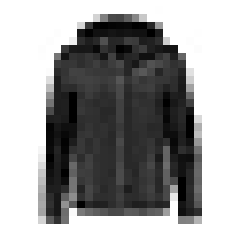

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
y_train.shape, y_train

((55000,), array([4, 0, 7, ..., 3, 0, 5], dtype=uint8))

In [7]:
# needs corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

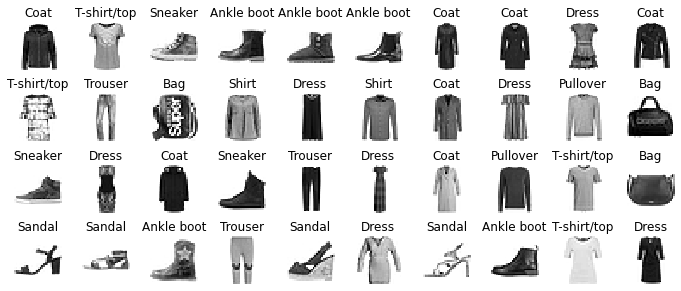

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # conver to 1D array, like reshape(-1, 1)
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-04-08 14:11:48.019787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 14:11:48.039824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 14:11:48.039952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 14:11:48.040458: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- First hidden layer has 784 x 300 connection weights, plus 300 bias terms (parameters). This gives the model more flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when don't have a lot of training data.
- All parameters of a layer can be accessed using its get_weights(), and set_weights() methods. For Dense layer, it includes both weights and bias terms.

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [14]:
## Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- Using "sparse_categorical_crossentropy" for loss function, because we have sparse labels (each instance is just a target class index, from 0 - 9). If we were doing binary classification (one or more binary labels), then we using "sigmoid" instead of "softmax" for the output layer, and we use the "binary_crossentropy" loss.
- optimizer="sgd" means that we will train the model using simple SGD.
- This is a classifier that is useful to measure its " accuracy" during training and evaluation.

In [15]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=0)

2022-04-08 14:11:49.350335: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [16]:
history.params

{'verbose': 0, 'epochs': 100, 'steps': 1719}

In [17]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [18]:
# most important dictionary contains the loss and extra metrics it measure in each epoch
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

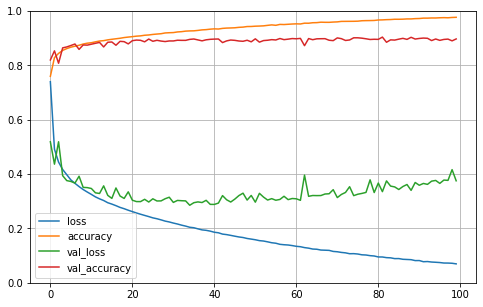

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

- The Learning curve: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch

Both training acc and validation acc increase lightly, and training loss decrease, but val_loss increase steadly.

The val curve and training curve have a gap, which means that there are not too much overfitting.

The model look better in training data, but very poor in val data.

Both training and val dataset performance look not good from the begining. 

The val error is computed at the end of each epoch, while training error is computed using a running mean during each epoch. 

### Notices
We can try to adjust the performance of model parameters.

First tweak a learning rate, or try another optimizer (always retune the learning rate after changing any hyperparameters)

If model is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. We can try another hyperparameter, like batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32).

In [20]:
model.evaluate(X_test, y_test)  # simply good :(

313/313 [==============================] - 0s 747us/step - loss: 0.4215 - accuracy: 0.8876


[0.4214881956577301, 0.8876000046730042]

In [21]:
# use the model to make prediction of 4 first instances in test set
X_new = X_test[:4]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
#y_pred = model.predict_classes(X_new)  # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

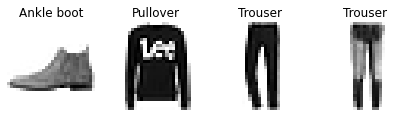

In [24]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [25]:
model.save('models/fashion_clf_keras.h5', history)

## 2. Regression MLP using the Sequential API
Let’s switch to the California housing problem and tackle it using a regression neural network.

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
## build the Sequencial model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 552us/step - loss: 0.4212


In [33]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

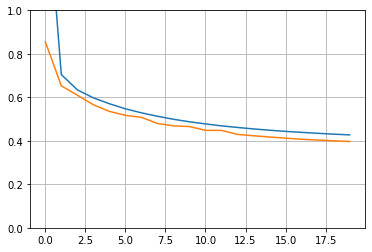

In [30]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
y_pred, y_test[:3]

(array([[0.38856643],
        [1.6792021 ],
        [3.1022794 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [38]:
model.save('models/housing_reg_keras.h5', history)

X_train.shape[1:], X_train.shape

((8,), (11610, 8))

## 4. Building Complex Models using the Functional API
## 4.1. Wide and Deep Neural Network
Sometimes useful to build neural networks with more complex topologies. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). That's wide and deep neural network.

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_9[0][0]']          

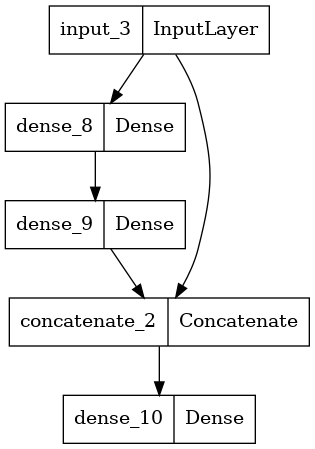

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.summary()
keras.utils.plot_model(model)#, show_shapes=True)

Look insights the code:
- First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly.
- Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.
- We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
- Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediately calls it with the given inputs.
- Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.
- Lastly, we create a Keras Model , specifying which inputs and outputs to use.

In [41]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid), verbose=0)
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 937us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 955us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 945us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 940us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 955us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 952us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 937us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 955us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 951us/step - loss: 0.4659 

In [42]:
y_pred, y_test[:3]

(array([[0.47011763],
        [1.8735292 ],
        [3.3798187 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

## 4.2. Handling multiple inputs
Add Subset of features through the Wide path and different subset through the deep path. For example, if we want to sent 5 features through the wide path (0 - 4) and 6 features through the deep path (2 - 7).

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 30)           930         ['dense_13[0][0]']               
                                                                                            

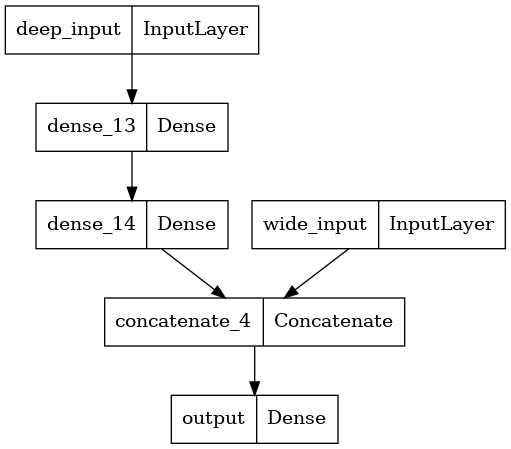

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()
keras.utils.plot_model(model)#, show_shapes=True)

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid), verbose=0)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 607us/step - loss: 0.4219


In [46]:
y_pred, y_test[:3]

(array([[0.30591297],
        [1.9540735 ],
        [3.4426103 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

## 4.3. Handling multiple outputs, in this example to add an auxiliary output for regularization
There are many use cases in which you may want to have multiple outputs:

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 30)           930         ['dense_15[0][0]']               
                                                                                            

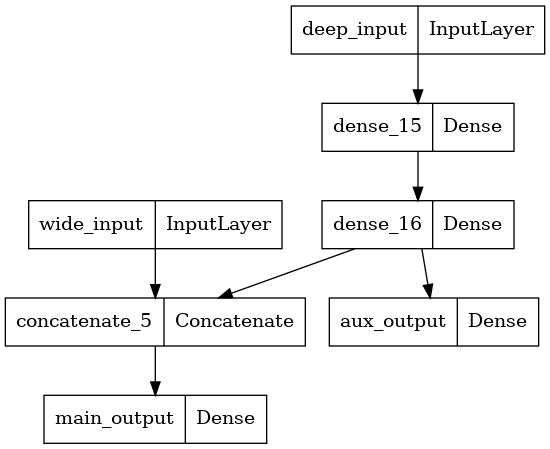

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

model.summary()
keras.utils.plot_model(model)#, show_shapes=True)

In [48]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), verbose=0)

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 805us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


In [49]:
total_loss, main_loss, aux_loss

(0.46683046221733093, 0.4177946448326111, 0.9081541299819946)

In [51]:
y_pred_main, y_pred_aux

(array([[0.26762432],
        [1.980763  ],
        [3.3396287 ]], dtype=float32),
 array([[0.9593649],
        [1.9240993],
        [2.5152814]], dtype=float32))

## 4.4 Using the Subclassing API to build the Dynamic models
Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This is static way of building the model.

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

In [52]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [54]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)), verbose=0)
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

model.summary()

162/162 [==============================] - 0s 797us/step - loss: 0.5841 - output_1_loss: 0.5188 - output_2_loss: 1.1722
Model: "wide_and_deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            multiple                  210       
                                                                 
 dense_18 (Dense)            multiple                  930       
                                                                 
 dense_19 (Dense)            multiple                  36        
                                                                 
 dense_20 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


## 4.5 Using Callbacks during training
The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint . In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set.

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb], verbose=0)

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 574us/step - loss: 0.4382


In [56]:
# Another way to implement early stopping is to simply use the EarlyStopping call‐
# back. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), 
# and optionally roll back to the best model

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 927us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 948us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 939us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 952us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 947us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 959us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 947us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 952us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 974us/step - los

In [57]:
# customize callback with more control easier
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

326/363 [=========================>....] - ETA: 0s - loss: 0.3292
val/train: 1.08
363/363 [==============================] - 0s 1ms/step - loss: 0.3302 - val_loss: 0.3559


# TensorBoad for Visualization

In [58]:
# root log dir for tensorboad log
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_04_09-01_04_35'

In [65]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb], verbose=0)

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

$ tensorboard --logdir=./my_logs --port=6006
You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [66]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 127963), started 0:08:51 ago. (Use '!kill 127963' to kill it.)

In [62]:
# check out the other available logging option
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [64]:
help(keras.layers.Dense.__init__)

Help on function __init__ in module keras.layers.core.dense:

__init__(self, units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)



# Fine-Tuning Hyperparameters
Number of layers, number of Neurons per layer, the type of Activation function to use in each layer, the Weight initialization logic, and so on. How do you know what combination hyperparameters in the best for task?

Use K-fold Cross-Validation: combination of hyperparameters and see which one works best on the validation set. using GridSearchCV or RandomizedSearchCV.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly.
1. Hyperopt: library for optimizing over all sorts of complex search spaces (including real values such as learning rate, and discrect values such as number of layers)
2. Hyperas, kopt, or Talos: optimining hyperparameters for Keras models
3. Keras Tuner: optimization lib by Google
4. Scikit-Optimize (skopt): general-purpose optimization lib, BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV
5. Spearmint: a Bayesian optimization lib
6. Hyperband: a fast hyperparameter tuning lib
7. Sklean-Deap: based on evolutionary algorithms, with a GridSearchCV-like interface.
8. Many other services for optimization like Google Cloud AI platform's hyperparameter tuning service, Arimo, SigOpt and CallDesk's Oscar.

## 1. Number of Hidden Layers
Number of layers depends on the complex problems. Normally, real data in the hierarchical way, and lower hidden layers model low-level structures (eg., line segment of various shapes and orientation), intermediate hidden layers combine these low-level structures to model intermediate-level structures (eg., squares, circles), and the highest hidden layers and output layer combine these intermediate structures to model high-level structures (eg., faces).

For more complex problems, we can ramp up the number of hidden layers util we start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozen of layers (or even hundreds).

## 2. Number of Neurons per Hidden layer
The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 × 28 = 784 input neurons and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting. If the layer has too few neurons, it will not have enough representational power to preserve all the useful information from the input (eg., apply two neurons only output 2D data, if using it for 3D, some info will be lost).

In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.

## 3. Learning Rate, Batch size, and other Hyperparameters
Other sides of optimization hyperparameters

## 3.1. Learning Rate
Most important hyperparameter. In general, the
optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges, as we saw in Chapter 4). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., 10 -5 ) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by exp(log(10 6 )/500) to go from 10 -5 to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate. We will look at more learning rate techniques in Chapter 11.

The optimal learning rate depends on the other hyperparameters — especially the batch size — so if you modify any hyperparameter, make sure to update the learning rate as well.

## 3.2. Optimizer
Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important. We will see several advanced optimizers in Chapter 11.

## 3.3. Batch size
The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. Using small batch size (2 - 32) was preferable because small batches led to better models in less training time.

## 3.4. Activation function
We discussed how to choose the activation function earlier in this chapter: in general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

## 3.5. Number of iterations
In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.


In [3]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)

/tmp/ipykernel_145056/3079905672.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
2022-04-09 15:43:04.355190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 15:43:04.379408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 15:43:04.379537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 15:43:04.379969: I tensorfl

In [4]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 558us/step - loss: 0.3348


In [6]:
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)

In [7]:
y_pred

array([0.5971379, 1.5424514, 4.1004257], dtype=float32)

In [8]:
# fine-tune keras_reg model
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7861 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 0s 942us/step - loss: 0.4791 - val_loss: 0.4998
Epoch 3/100
242/242 [==============================] - 0s 955us/step - loss: 0.4595 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 0s 976us/step - loss: 0.4497 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 0s 955us/step - loss: 0.4455 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 0s 969us/step - loss: 0.4427 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 0s 983us/step - loss: 0.4468 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 0s 964us/step - loss: 0.4394 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 0s 956us/step - loss: 0.4631 - val_loss: 0.4199
Epoch 10/100
2

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd46f30b2b0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [9]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [10]:
rnd_search_cv.best_score_

-0.3220732510089874

In [11]:
rnd_search_cv.best_estimator_

In [12]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 674us/step - loss: 0.3031


-0.3030615746974945

In [13]:
model = rnd_search_cv.best_estimator_.model
model

In [14]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 617us/step - loss: 0.3031


0.3030615746974945

In [15]:
model.save('models/best_model_tuning.h5')